<a href="https://colab.research.google.com/github/muhammadhusni29/Attendance-Internship/blob/main/cor_reg_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By using weather data in Szeged city, I predict temperature using Multiple Linear Regression method and test some classical Ordinary Least Square assumptions whether my model that I've build is good or not.

# Predict Temperature with Multiple Linear Regression 

In [ ]:
# dataset management
import pandas as pd
# linear algebra stuff
import numpy as np
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# mathematics 
from math import sqrt
# machine learning stuff 
from sklearn.linear_model import LinearRegression
# statistics stuff
from scipy.stats import kstest

## Load the data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Regression analysis and correlation/Assignment2/weatherHistory.csv")

## Exploratory Data Analysis

Weather Szeged data in 2006-2016. The types of this data is multivariate and timeseries. 
[Data Source](https://www.kaggle.com/budincsevity/szeged-weather) <br>
To predict the temperature I'll choose the independent variables that have hight correlation with the target variable. 


In [ ]:
data.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


### Statistical Descriptions

In [ ]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### Histogram
I choose histogram visualization to check the how is the data is distributed. 

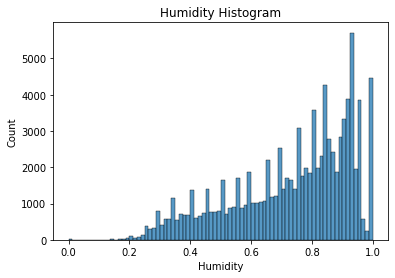

In [ ]:
sns.histplot(data=data, x="Humidity")
plt.title("Humidity Histogram")
plt.show()

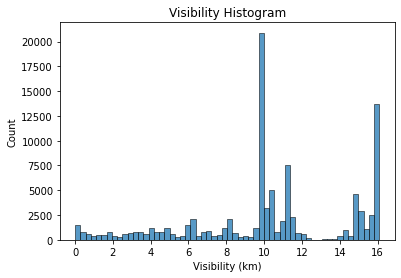

In [ ]:
sns.histplot(data=data, x="Visibility (km)")
plt.title("Visibility Histogram")
plt.show()

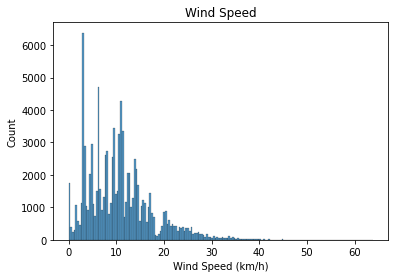

In [ ]:
sns.histplot(data=data, x="Wind Speed (km/h)")
plt.title("Wind Speed")
plt.show()

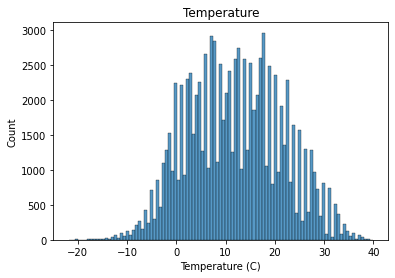

In [ ]:
sns.histplot(data=data, x="Temperature (C)")
plt.title("Temperature")
plt.show()

## Data Preprocessing

In [ ]:
data = data[['Temperature (C)', 'Humidity','Visibility (km)', 'Wind Speed (km/h)']].head(200)
data.head()

,Temperature (C),Humidity,Visibility (km),Wind Speed (km/h)
0,9.472222,0.89,15.8263,14.1197
1,9.355556,0.86,15.8263,14.2646
2,9.377778,0.89,14.9569,3.9284
3,8.288889,0.83,15.8263,14.1036
4,8.755556,0.83,15.8263,11.0446


## Pearson Correlation

#### $r_{xy} = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum( x_i-\bar{x})^2 \sum(y_i-\bar{y})^2}} $

### Temperature and Humidity

In [ ]:
temperature_series = data['Temperature (C)']
humidity_series = data['Humidity']
visibility_series = data['Visibility (km)']
wind_speed_series = data['Wind Speed (km/h)']

In [ ]:
sum_up = []
sum_down_x = []
sum_down_y = []

for x_i, y_i in zip(data['Humidity'], data['Temperature (C)']):
  sum_up.append((x_i-humidity_series.mean())*(y_i-temperature_series.mean()))
  sum_down_x.append((x_i-humidity_series.mean())**2)
  sum_down_y.append((y_i-temperature_series.mean())**2)


In [ ]:
print(sum(sum_up)/sqrt((sum(sum_down_x))*(sum(sum_down_y))))

-0.7880470564526484


### Temperature and Visibility 

In [ ]:
sum_up = []
sum_down_x = []
sum_down_y = []

for x_i, y_i in zip(data['Visibility (km)'], data['Temperature (C)']):
  sum_up.append((x_i-visibility_series.mean())*(y_i-temperature_series.mean()))
  sum_down_x.append((x_i-visibility_series.mean())**2)
  sum_down_y.append((y_i-temperature_series.mean())**2)


In [ ]:
print(sum(sum_up)/sqrt((sum(sum_down_x))*(sum(sum_down_y))))

0.04341373758063724


### Temperature and Wind Speed

In [ ]:
sum_up = []
sum_down_x = []
sum_down_y = []

for x_i, y_i in zip(data['Wind Speed (km/h)'], data['Temperature (C)']):
  sum_up.append((x_i-wind_speed_series.mean())*(y_i-temperature_series.mean()))
  sum_down_x.append((x_i-wind_speed_series.mean())**2)
  sum_down_y.append((y_i-temperature_series.mean())**2)


In [ ]:
print(sum(sum_up)/sqrt((sum(sum_down_x))*(sum(sum_down_y))))

0.17591990157802367


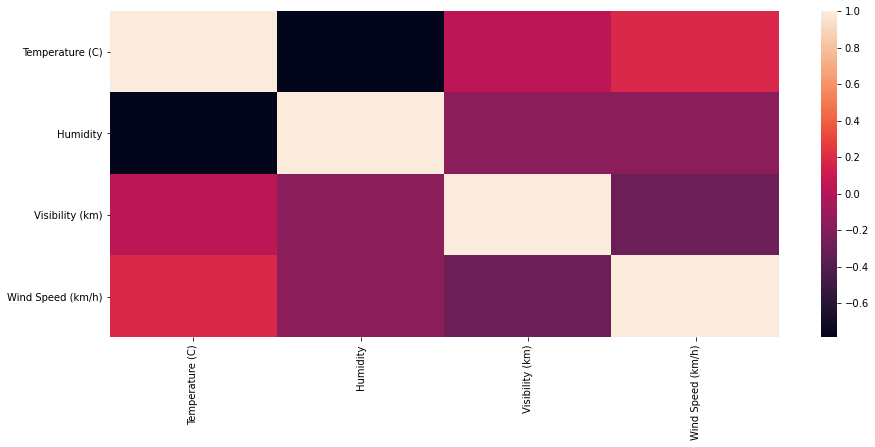

In [ ]:
sns.heatmap(data.corr())
a = plt.gcf()
a.set_size_inches(15,6)

## Multiple Linear Regression

To estimate the unknown parameters in a linear regression model, I choose the Ordinary Least Square method. Based on Wikipedia, OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable.

### Formula
$\hat{y} = X\hat{\beta} + \epsilon $ <br>
$\hat{B}=(X^TX)^{-1}X^Ty$

<br>
y = $\begin{bmatrix}
y_1\\
y_2\\
y_3\\
.\\
.\\
.\\
y_n
\end{bmatrix}$

---
X = $\begin{bmatrix}
1 & X_{1,1} & X_{1,2}&...&X_{1,p}\\
1 & X_{2,1} & X_{2,2}&...&X_{2,p}\\
1 & X_{1,1} & X_{1,2}&...&X_{1,p}\\
. & & & & .\\
. & & & & .\\
. & & & & .\\
1 & X_{n,1} & X_{n,2}&...&X_{n,p}\\
\end{bmatrix}$

### Calculations

In [ ]:
# convert the data into matrix or vector
X = data.drop(columns=['Temperature (C)']).to_numpy()
y = data['Temperature (C)'].to_numpy()

# create the matrix than contains 1 in the collumn one 
X = np.concatenate((np.full((200,1),1), X), axis=1)
# invers the matrix
xtx = np.linalg.inv(np.matmul(np.transpose(X),X))
# mulplied process
xty = np.matmul(np.transpose(X), y)
# the parameters of our OLS model 
parameters = np.matmul(xtx, xty)

In [ ]:
coefisien = np.matmul(xtx, xty)[1:]
intercept = np.matmul(xtx, xty)[:1]

In [ ]:
parameters

array([ 2.80074210e+01, -2.12918104e+01, -9.60855586e-02,  1.38725474e-02])

In [ ]:
intercept

array([28.00742103])

In [ ]:
coefisien

array([-2.12918104e+01, -9.60855586e-02,  1.38725474e-02])

#### Predict Function
A function that can predict $y$-value by assigning the $X$-value.   

In [ ]:
def predict(data, parameter):
  y_pred = np.matmul(data, parameter)
  return y_pred

In [ ]:
y_pred = predict(X, parameters)

## Linear Regression

In [ ]:
x = data.drop(columns=['Temperature (C)']).to_numpy()

In [ ]:
linreg = LinearRegression()
linreg.fit(x, y)

In [ ]:
residual = y-linreg.predict(x)

# Residual Testing

---
Ordinary Least Square (OLS) Linear regression have some assumptions than can help us to know whether our model produces the best estimates or not. If some of these assumptions are not true, then we might need to employ remedial measures or use other estimation methods. You can see more details about the assumptions in [here](/https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)

In this project I just tested some residual assumptions such as No heteroscedasticity, the error term is normally distributed and .....

In [ ]:
residual = y-y_pred 

## OLS Assumption 1: The Error Term is Normally distributed 
This assumption is optional, it's mean that the residual doesn't require normally distributed.**Satisfying this assumption allows us to perform statistical hypothesis testing and generate reliable confidence intervals and prediction intervals**.

##### Standardize Residuals
$Standardized\space residuals\space i = \frac{Residual_i}{Standard\space deviation\space of \space residual_i}$ 

In [ ]:
standard_residual = []
std_residual = np.std(residual)
for residual_i in residual:
  standard_residual.append(residual_i/std_residual) 
# convert standard residual list to ndarray
#standard_residual

### Histogram and Normal P-Plot of Regression Standaridized Residual 
**Probability Plot** <br>
Probability plot is another way to visualize the distributions of data. 

The probability plot can be of two types:
* P-P plot: The (Probability-to-Probability) p-p plot is the way to visualize the comparing of cumulative distribution function (CDFs) of the two distributions (empirical and theoretical) against each other.
* Q-Q plot: The q-q (Quantile-to-Quantile) plot is used to compare the quantiles of two distributions. The quantiles can be defined as continuous intervals with equal probabilities or dividing the samples between a similar way The distributions may be theoretical or sample distributions from a process, etc. The normal probability plot is a case of the q-q plot.<br>
[source](https://www.geeksforgeeks.org/normal-probability-plot/)



**Normal Probabiliy Plot**
Is a way of knowing whether our data is normally distributed or not. 

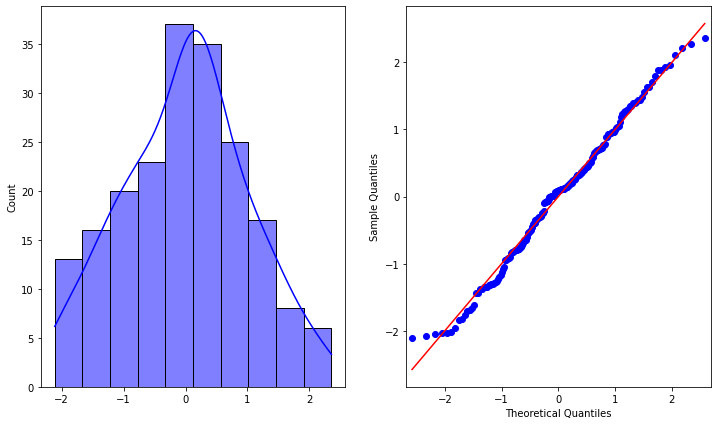

In [ ]:
import statsmodels.graphics.gofplots as sm
import statsmodels.api as sm
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(standard_residual,kde=True, color ='blue',ax=ax[0])
pplot = sm.ProbPlot(np.array(standard_residual))
pplot.qqplot(line='s', ax=ax[1])
plt.show()

### Kolmogorov-Smirnov Test for Normality
To test the error term is distributed normally or not, we can use Kolmogorov-Smirnov test. <br>
**Decission**:
* $Significance > 0.05$, then the residual is distributed normally
* $Significance < 0.05$, then the residual isn't distributed normally

In [ ]:
kstest(residual,'norm')

KstestResult(statistic=0.22787504121162228, pvalue=1.3079997334174105e-09)

### Kurtosis and Skewness

In [ ]:
from scipy.stats import kurtosis, skew
print("Kurtosis: ", kurtosis(residual))
print("Skew: ", skew(residual))

Kurtosis:  -0.44876298160108385
Skew:  -0.012132913221089286


## OLS Assumption 2 : No *Homoscedasticity*
Homoscedasticity refers to whether these residuals are equally distributed, or whether they tend to bunch together at some values, and at other values, spread far apart. <br>

[Source](https://www.statisticssolutions.com/testing-assumptions-of-linear-regression-in-spss/#:~:text=If%20we%20examine%20a%20normal,the%20residuals%20are%20normally%20distributed.&text=Homoscedasticity%20refers%20to%20whether%20these,other%20values%2C%20spread%20far%20apart.)


Text(0.5, 1.0, 'Scatter Plot standardized residual and y predicted ')

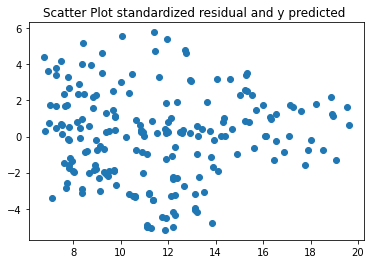

In [ ]:
plt.scatter(x=y_pred, y=residual)
plt.title("Scatter Plot standardized residual and y predicted ")

Kesimpulan: Tidak terjadi heterokedastisitas karena titik-titik menyebar secara acak pada plot di atas.

## OLS Assumption : Auto Correlations

### Durbin Watson Test

$H_0 = $ tidak ada auto korelasi (r=0) <br>
$H_1 = $ ada auto korelasi ($r\ne 0$) <br>

## $d = \frac{\sum^{n}_{u=2}(e_u-e_{u-1})^2}{\sum^n_{u=1}(e^2_u)}$

[Table Source](https://ototechblog.files.wordpress.com/2021/01/tabel-dw_statmat.pdf)

In [ ]:
from statsmodels.stats.stattools import durbin_watson
# Using statsmodels.durbin_watson() method
dw_hitung = durbin_watson(residual)

print(dw_hitung)

Kesimpulan: Nilai DW sebesar 0.19168, dengan menggunakan table Turbin-Watson (DW), dan $\alpha=0.05$ dan sebelumnya kami mengambil 200 sampel observation dengan 3 variable independent maka dari table tersebut kami dapatkan nilai $dL=1.7382$ dan $dU=1.7990$. Sehingga kesimpulannya adalah berkorelasi positif (+) karena nilai $dw$ hitung $=0.19168$ lebih kecil dari nilai $dL$.  

heheheheh